In [13]:
# Config
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

### Easy

In [14]:
# Use samples from the posterior distribution for the following Qs

p_grid = np.linspace(0, 1, 1000)

prior = np.repeat(1, 1000)

likelihood = stats.binom.pmf(6, 9, p_grid)

un_posterior = prior * likelihood

posterior = un_posterior / sum(un_posterior)

samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

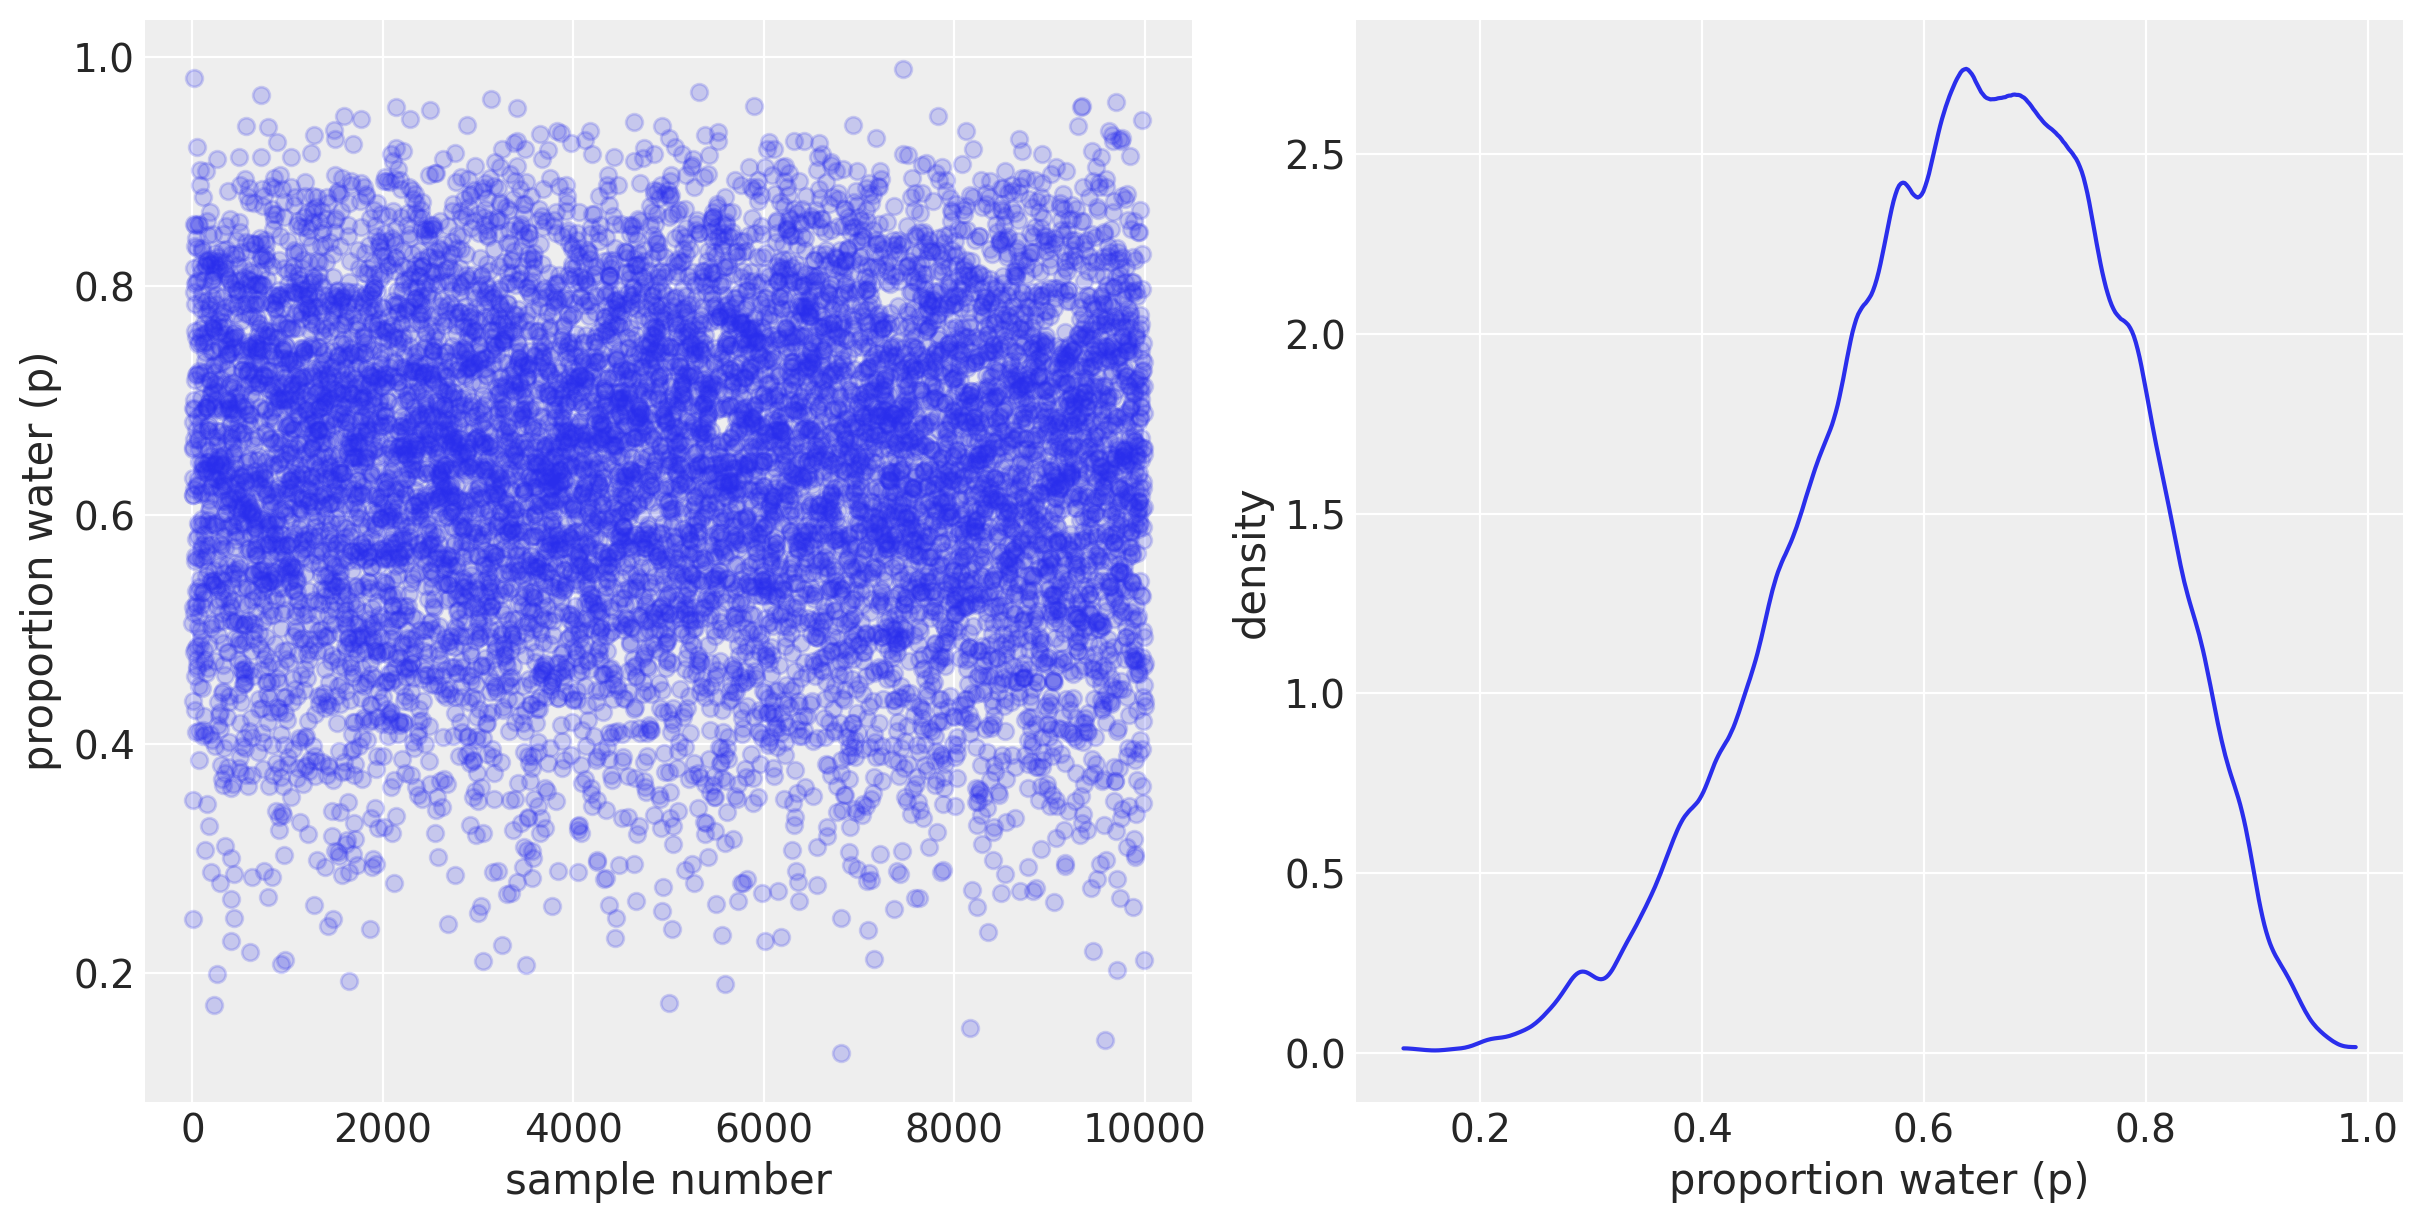

In [15]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

In [16]:
# 3E1 How much posterior probability lies below p = 0.2?
sum(samples < 0.2) / len(samples)

0.0008

In [17]:
# 3E2 How much posterior probability lies above p = 0.8?
sum(samples > 0.8) / len(samples)

0.1243

In [18]:
# 3E3 How much posterior probability lies between p = 0.2 and p = 0.8?
sum((samples > 0.2) & (samples < 0.8))/len(samples)

0.8749

In [19]:
# 3E4 20% of the posterior probability lies below which value of p?
np.percentile(samples, 20)

0.5175175175175175

In [20]:
# 3E5. 20% of the posterior probability lies above which value of p?
np.percentile(samples, 80)

0.7627627627627628

In [21]:
# 3E6. Which values of p contain the narrowest interval 
# equal to 66% of the posterior probability?
hdp_66_interval = az.hdi(samples, hdi_prob = 0.66)
print(hdp_66_interval)

[0.53053053 0.8028028 ]


In [22]:
# Sanity Checking
print(
    str(
        1
        - np.sum(samples > hdp_66_interval[1]) / len(samples)
        - np.sum(samples < hdp_66_interval[0]) / len(samples)
    )
)

0.6609999999999999


In [23]:
# 3E7. Which values of p contain 66% of the posterior probability,
# assuming equal posterior probability both below and above the interval?
np.percentile(samples, [(1/6*100), (5/6*100)])

array([0.4984985 , 0.77977978])

### Medium

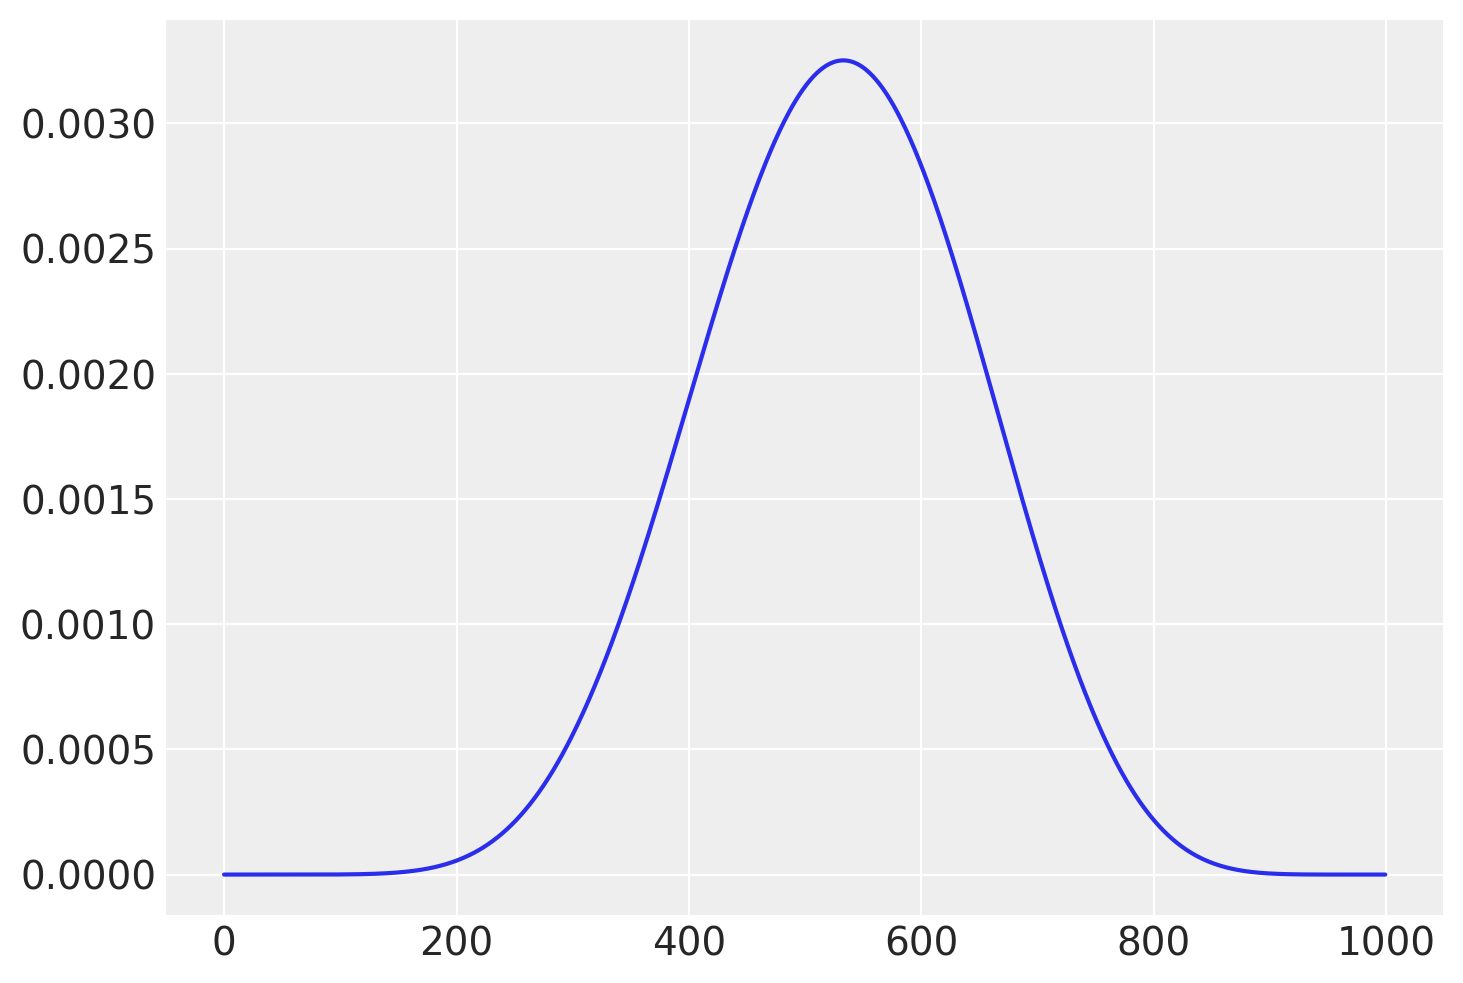

In [24]:
# 3M1: 8 water in 15 tosses, construct grid approx:

p_grid = np.linspace(0, 1, 1000)

prior = np.repeat(1, 1000)

likelihood = stats.binom.pmf(8, 15, p_grid)

un_posterior = prior * likelihood

posterior = un_posterior / sum(un_posterior)

plt.plot(posterior)

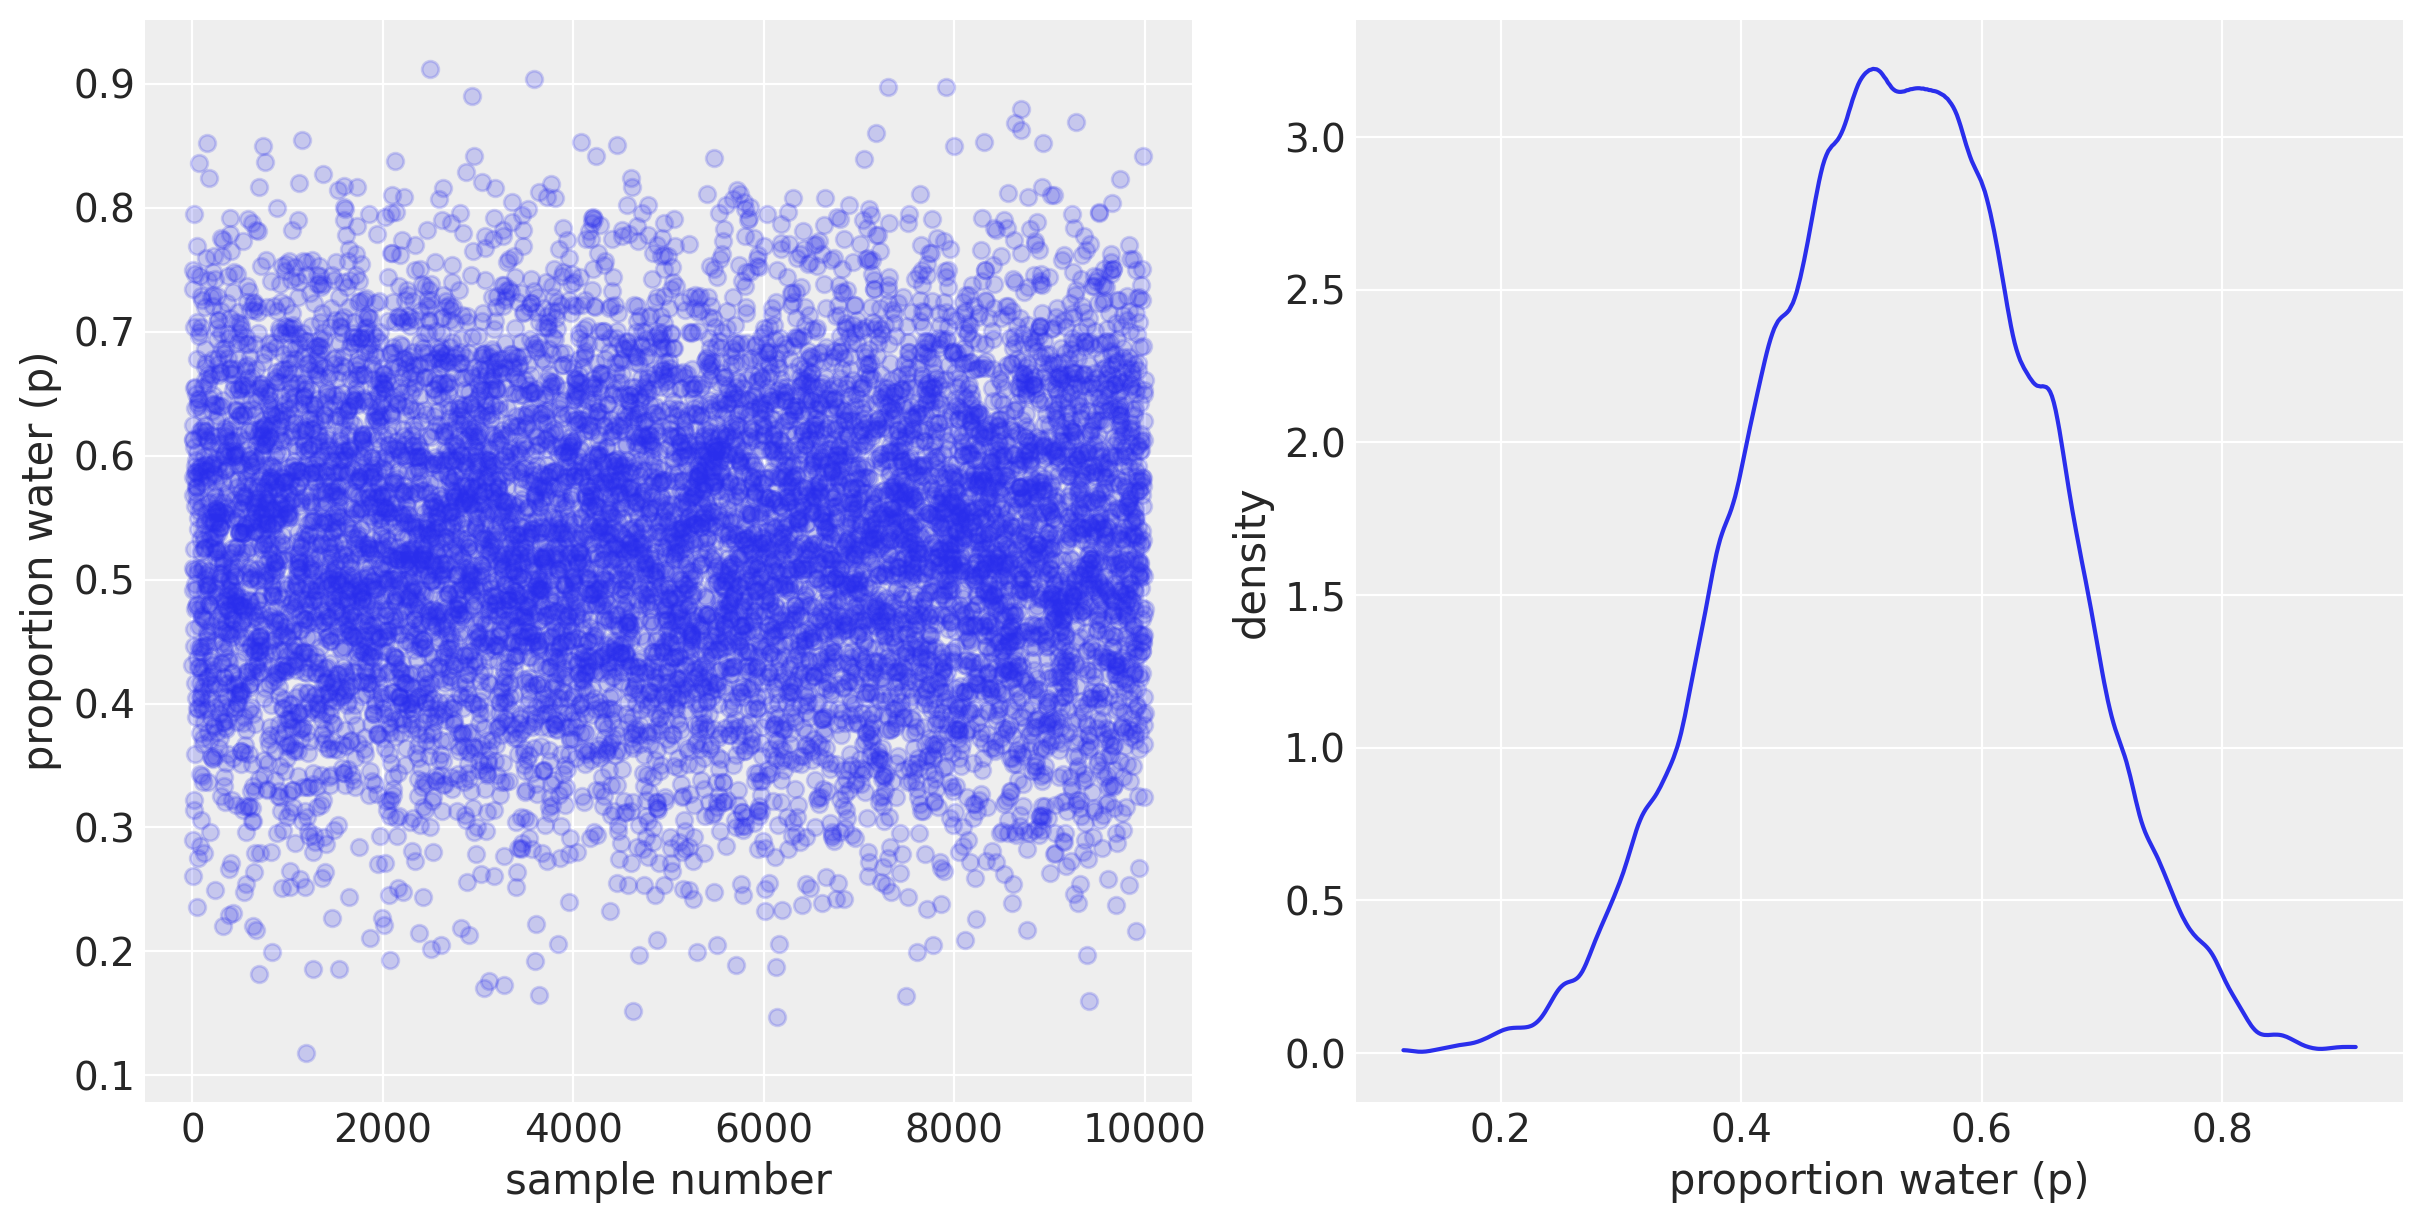

In [25]:
# 3M2. Draw 10,000 samples from the grid approximation from above. Then use the samples to cal-
# culate the 90% HPDI for p.

samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

In [26]:
hdpi_90 = az.hdi(samples, hdi_prob=0.9)
print(hdpi_90)

[0.34034034 0.72572573]


[ 8 12  8 ...  9  7  6]


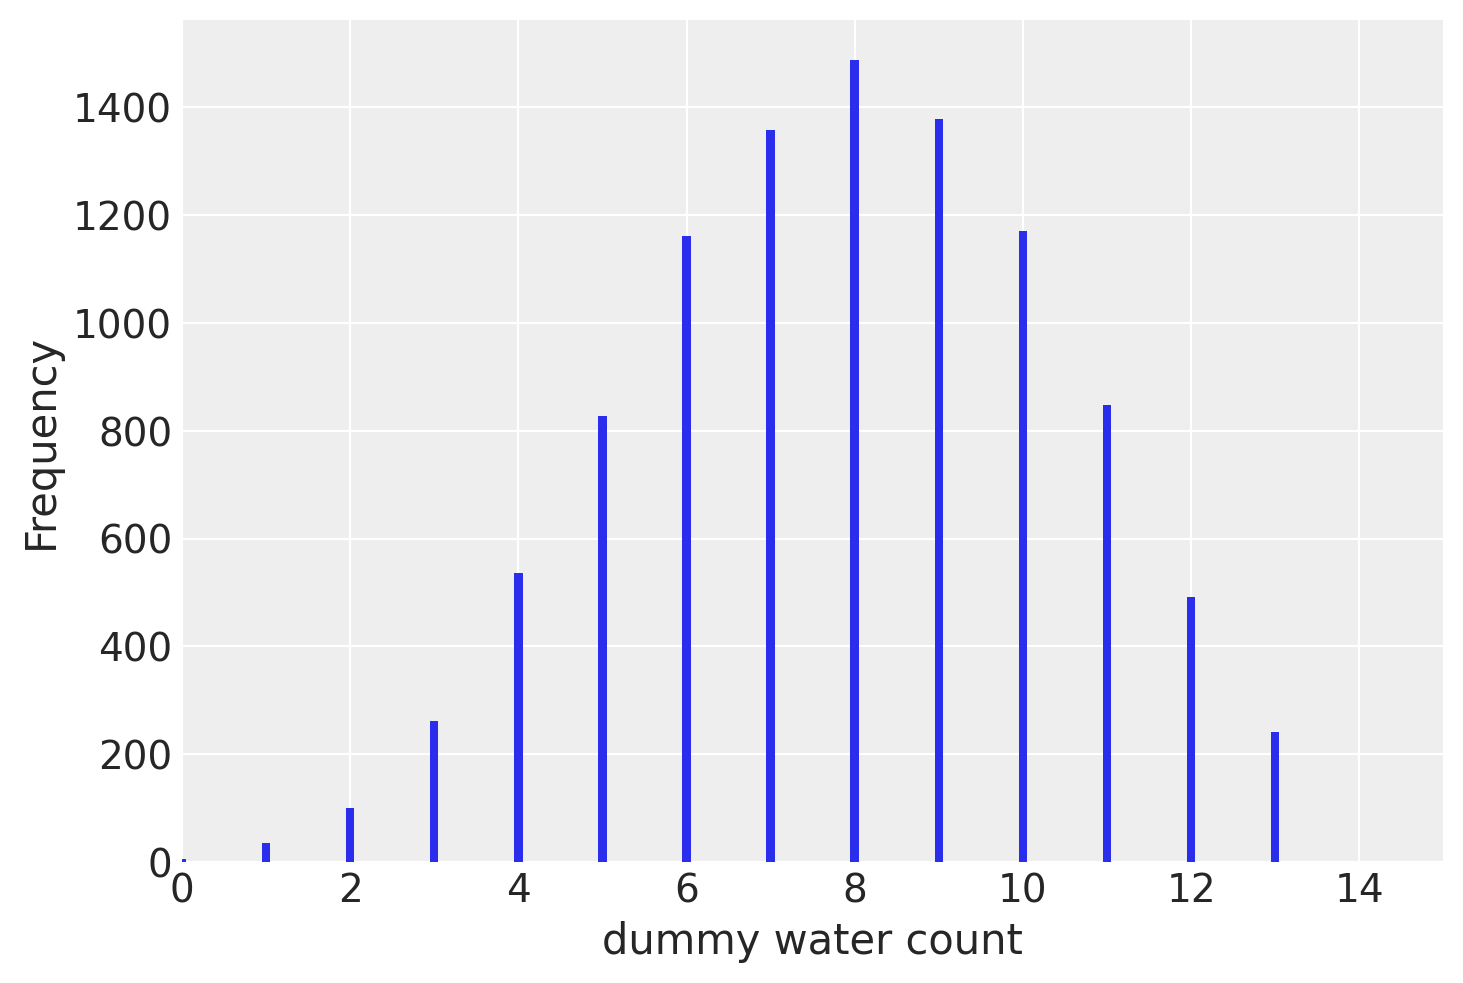

In [27]:
# 3M3. Construct a posterior predictive check for this model and data. 
# This means simulate the distribution of samples, 
# averaging over the posterior uncertainty in p. 
# What is the probability of observing 8 water in 15 tosses?

samples2 = stats.binom.rvs(n=15, size=int(1e4), p=samples)
print(samples2)

bar_width = 0.1
plt.hist(samples2, bins=np.arange(0, 15) - bar_width / 2, width=bar_width)
plt.xlim(0, 15)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

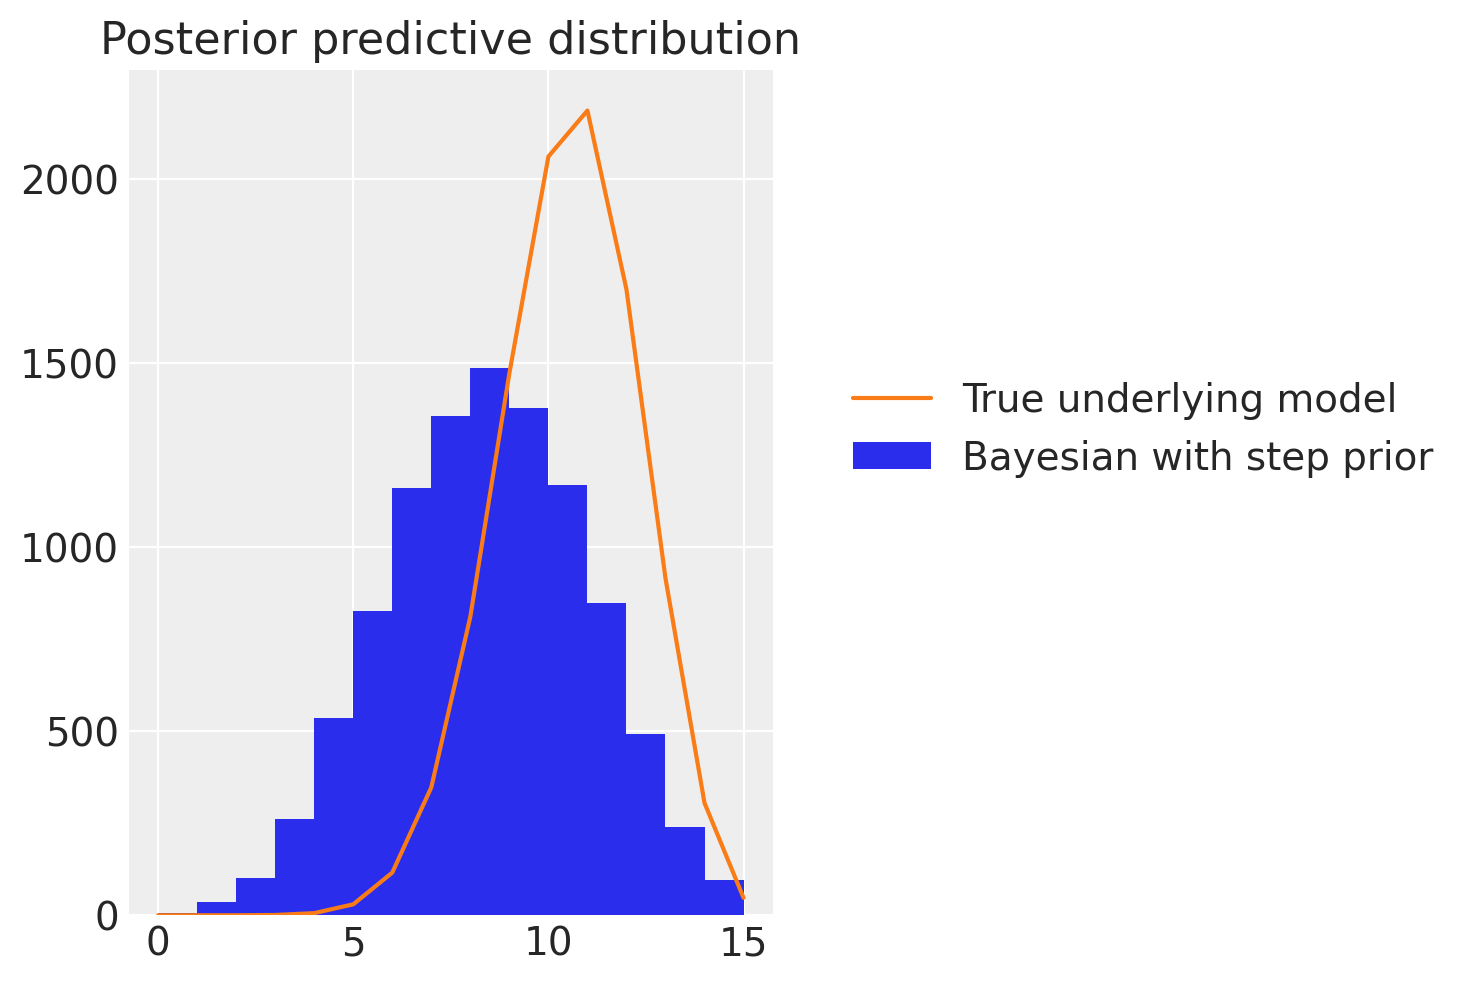

In [28]:
plt.hist(samples2, bins=15, label="Bayesian with step prior")
plt.plot(
    np.linspace(0, 15, 16),
    10000 * stats.binom.pmf(np.linspace(0, 15, 16), n=15, p=0.7),
    label="True underlying model",
)
plt.title("Posterior predictive distribution")
plt.legend(loc=(1.1, 0.5));


In [29]:
# What is the probability of observing 8 out of 15 tosses
(samples2 == 8).mean()

0.1488

[1 7 6 ... 3 2 5]


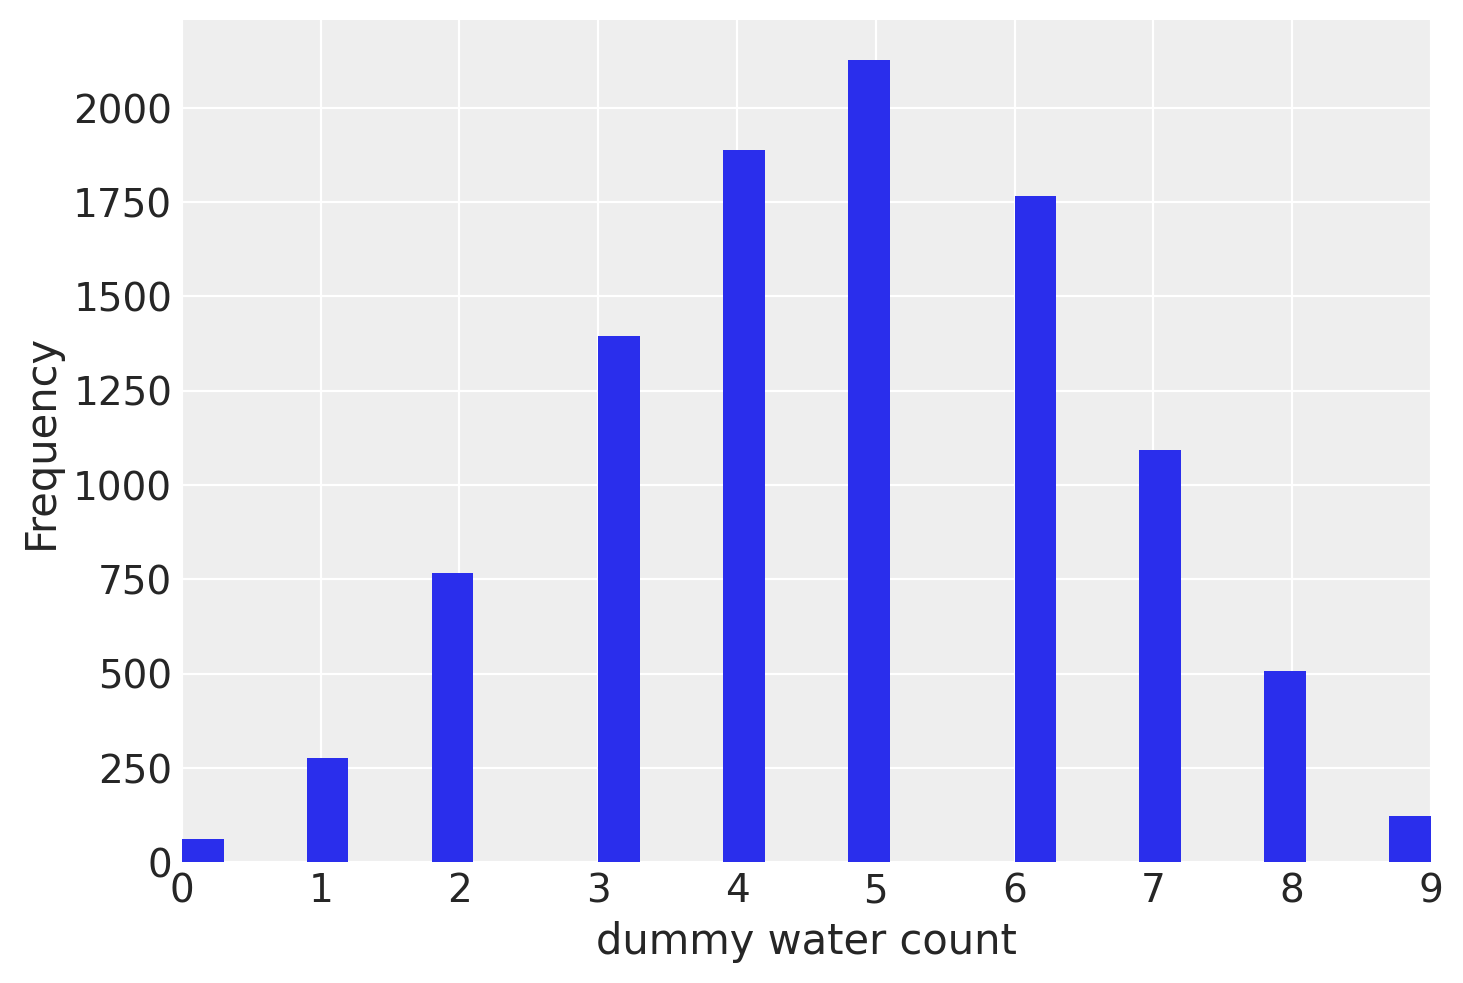

In [30]:
# 3M4
samples3 = stats.binom.rvs(n=9, size=int(1e4), p=samples)
print(samples3)

bar_width = 0.1
plt.hist(samples3, bins=30)
plt.xlim(0, 9)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

In [31]:
# What is the probability of observing 6 out of 9 tosses
(samples3 == 6).mean()

0.1767

In [32]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])

birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [34]:
sum(birth1) + sum(birth2)

111

In [35]:
#Hard 
# Use samples from the posterior distribution for the following Qs

p_grid = np.linspace(0, 1, 1000)

prior = np.repeat(1, 1000)

likelihood = stats.binom.pmf(111,200, p_grid)

un_posterior = prior * likelihood

posterior = un_posterior / sum(un_posterior)

samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

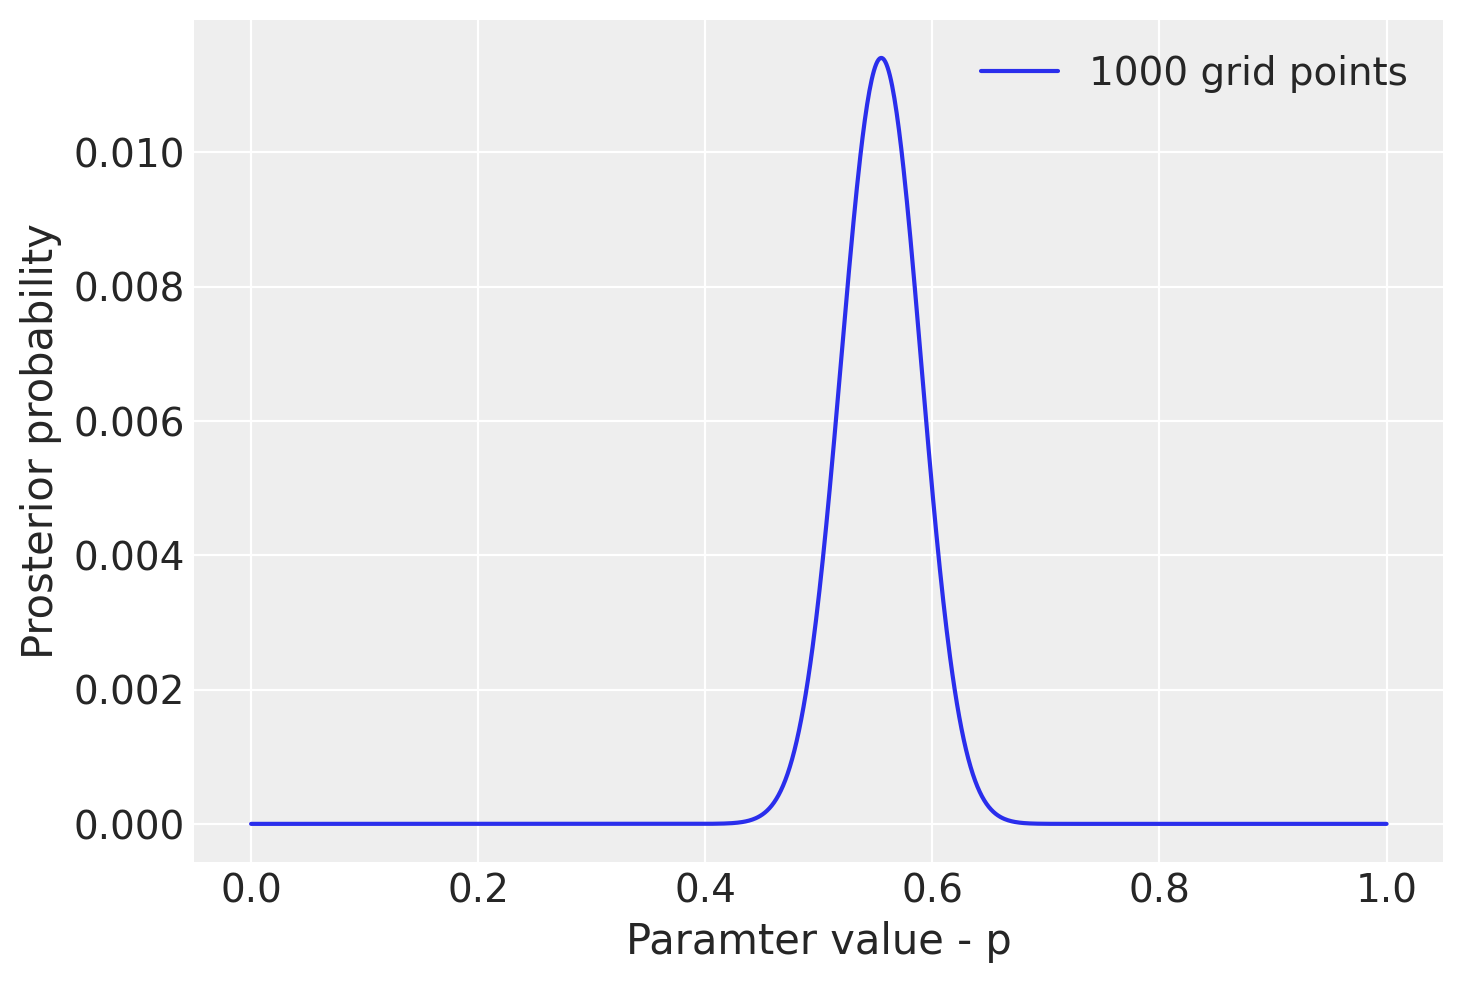

In [36]:
plt.plot(p_grid, posterior, label=str(1000) + " grid points")

plt.xlabel("Paramter value - p")
plt.ylabel("Prosterior probability")
plt.legend();

In [39]:
p_grid[np.argmax(posterior)]

0.5545545545545546

In [42]:
hdpi_50 = az.hdi(samples, hdi_prob=0.5)
print(hdpi_50)

[0.52652653 0.57357357]


In [43]:
hdpi_89 = az.hdi(samples, hdi_prob=0.89)
print(hdpi_89)

[0.5015015  0.61361361]


In [44]:
hdpi_97 = az.hdi(samples, hdi_prob=0.97)
print(hdpi_97)

[0.48248248 0.63563564]


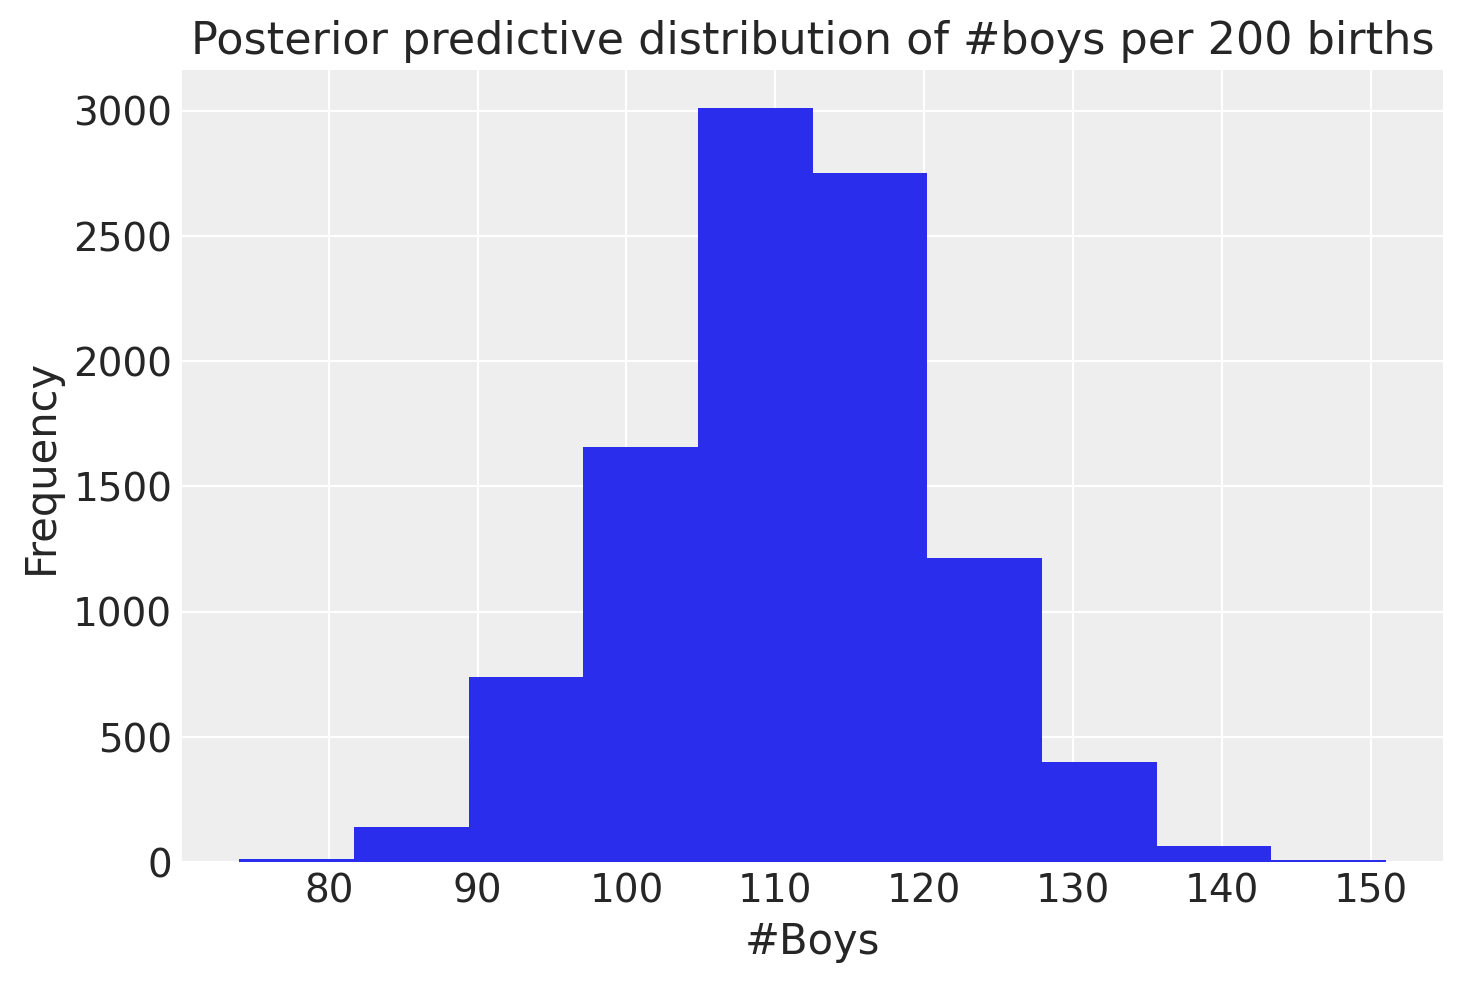

In [45]:
#3H3
ppd = np.random.binomial(n=200, p=samples)

plt.hist(ppd)
plt.title("Posterior predictive distribution of #boys per 200 births")
plt.xlabel("#Boys")
plt.ylabel("Frequency");

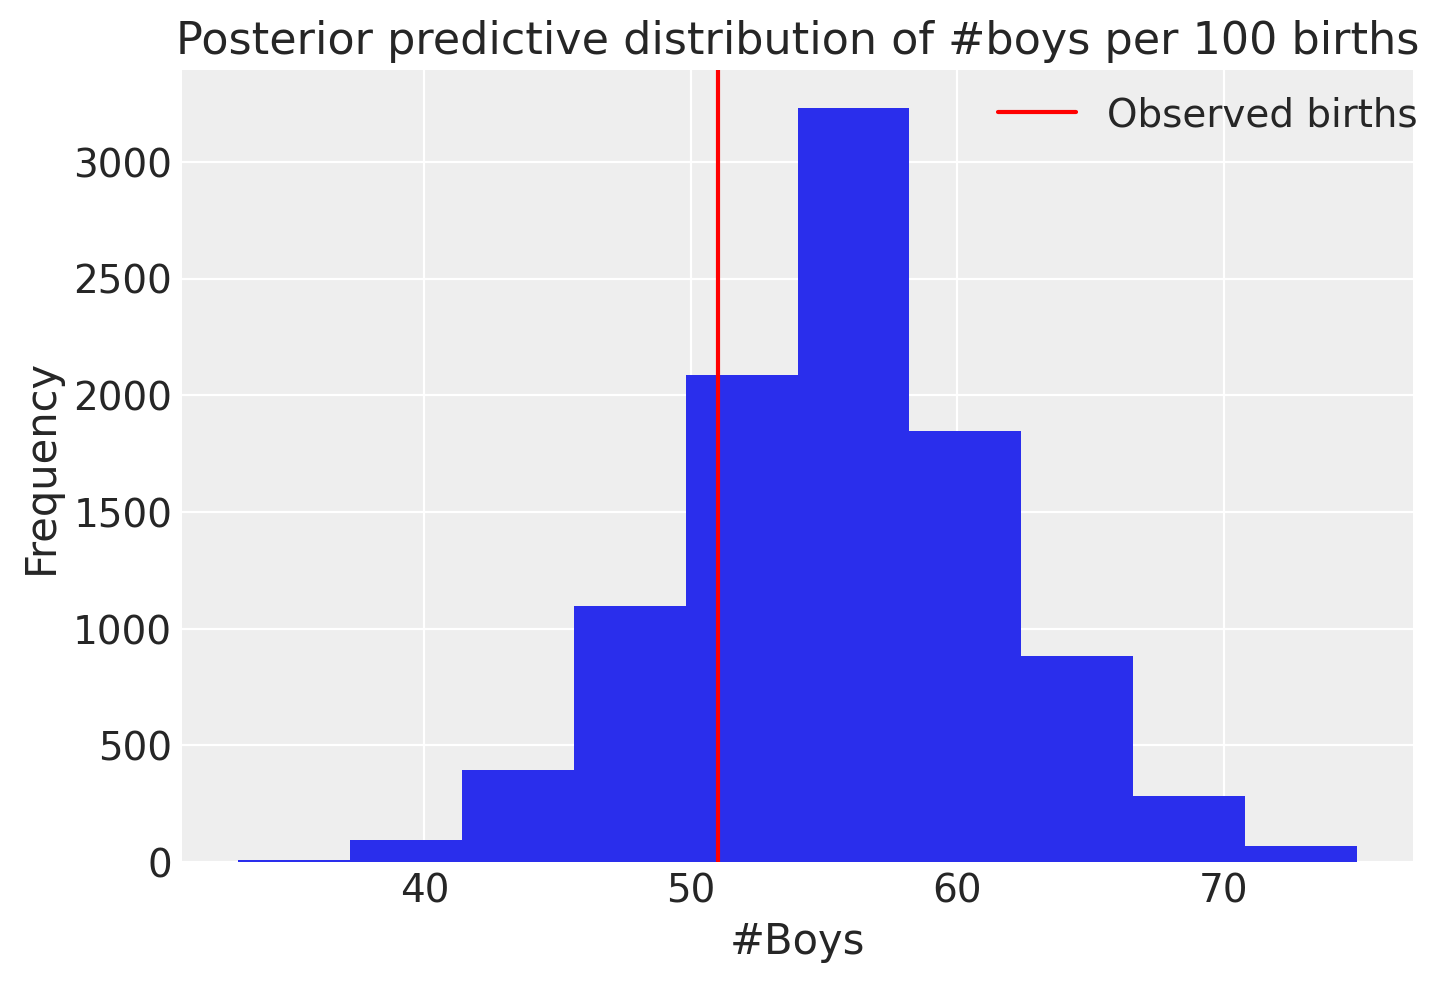

In [47]:
# get the ppd for 100 birth trials
ppd100 = np.random.binomial(n=100, p=samples)

plt.hist(ppd100)
plt.title("Posterior predictive distribution of #boys per 100 births")
plt.xlabel("#Boys")
plt.ylabel("Frequency")
plt.axvline(np.sum(birth1), c="r", label="Observed births")
plt.legend(loc=(0.65, 0.9));

In [63]:
# Number of boys that came after girl births
birth2[birth1 == 0].sum()

39

In [64]:
# Total number of first female births
birth2[birth1 == 0].shape[0]

49

In [65]:
# ppd for male after female (mAf) births
ppd_mAf = np.random.binomial(n=49, p=samples)

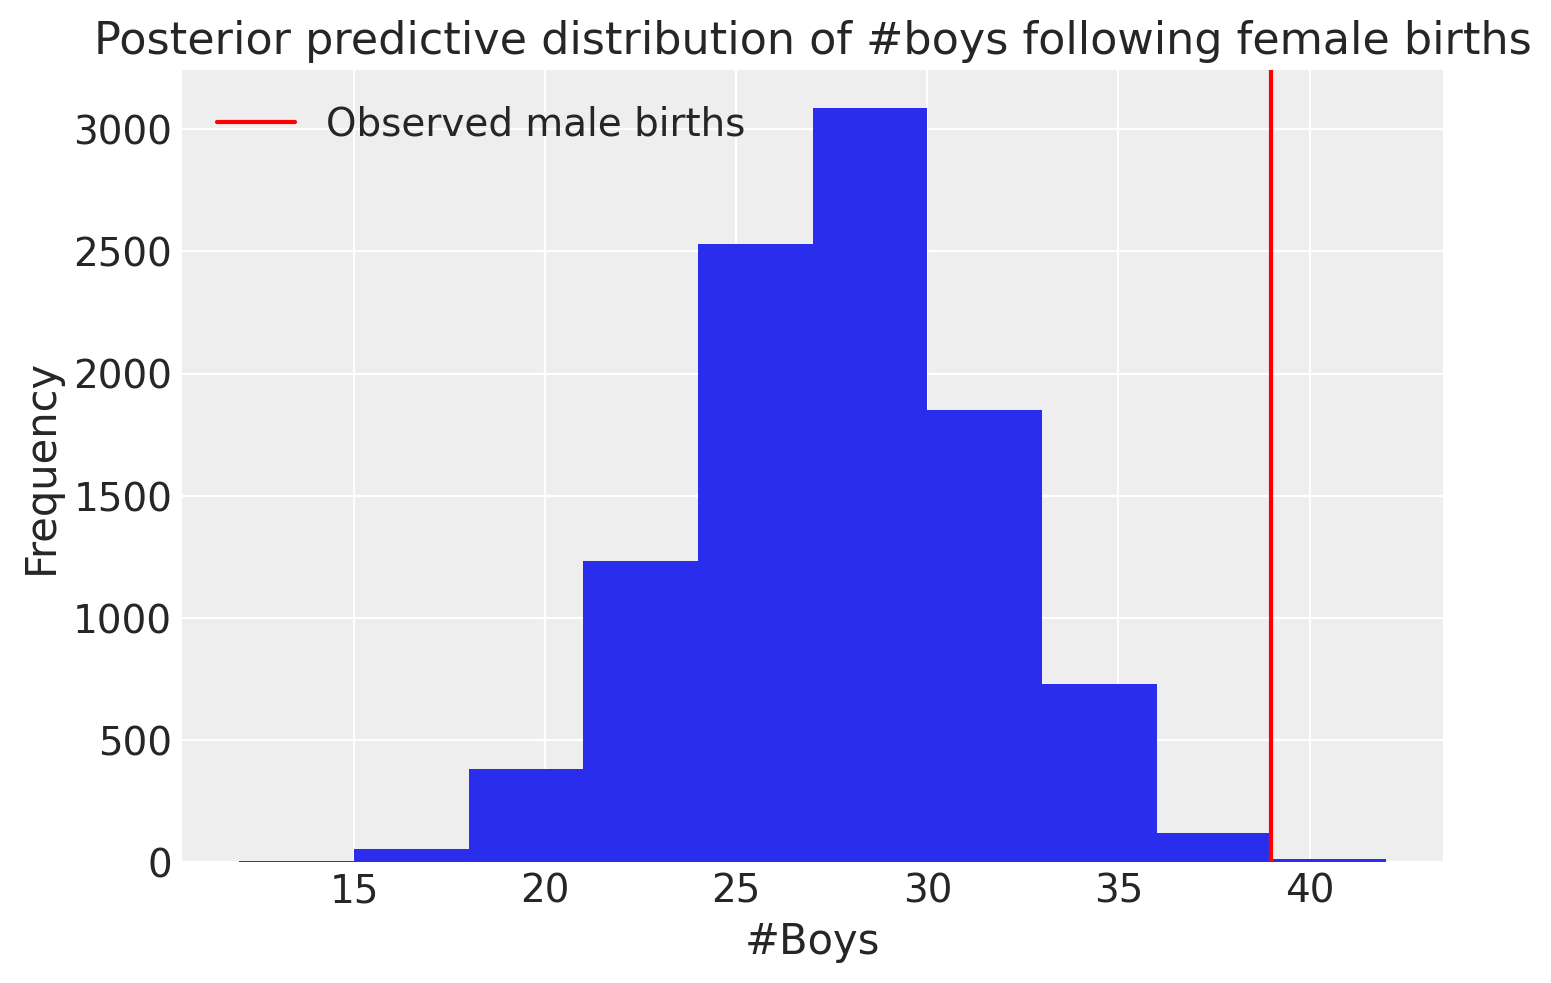

In [66]:
plt.hist(ppd_mAf)
plt.title("Posterior predictive distribution of #boys following female births")
plt.xlabel("#Boys")
plt.ylabel("Frequency")
plt.axvline(birth2[birth1 == 0].sum(), c="r", label="Observed male births")
plt.legend();


Out of 49 female first births, 39 were male; this implies that once a female has been born you become much more likely to have a male second child, which is in conflict with the model's assumption that these two are independent events